In [1]:
%load_ext autoreload
%autoreload 2

from lrp import *
from lrp.data import Data
from lrp import read_mnist
import os
from lrp.evaluate_rule import HeatmapEval
from lrp import utils
import os
from lrp.generator import *

/home/niels/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
mnist = read_mnist.read_data_sets("{}/datasets/mnist".format(os.environ["TF_PROJECTS"]), one_hot=True)
X_train = mnist.train.images[:100]
X_test = mnist.train.images[100:105]
Y_test = mnist.train.labels[100:105]

s_c = np.ones([28, 28])
s_c[13:15, 13:15] = 0
s_c = s_c.flatten()

m_c = np.ones([28, 28])
m_c[11:17, 11:17] = 0
m_c = m_c.flatten()

m_l = np.ones([28, 28])
m_l[4:14, 8:20] = 0
m_l = m_l.flatten()


Extracting /home/niels/Dokumente/Informatik/bachelor/tensorflow/datasets/mnist/train-images-idx3-ubyte.gz
Extracting /home/niels/Dokumente/Informatik/bachelor/tensorflow/datasets/mnist/train-labels-idx1-ubyte.gz
Extracting /home/niels/Dokumente/Informatik/bachelor/tensorflow/datasets/mnist/t10k-images-idx3-ubyte.gz
Extracting /home/niels/Dokumente/Informatik/bachelor/tensorflow/datasets/mnist/t10k-labels-idx1-ubyte.gz


In [3]:
data = Data(X=mnist.train.images, y=mnist.train.labels,
                X_val=mnist.validation.images, y_val=mnist.validation.labels,
                X_test=mnist.test.images, y_test=mnist.test.labels)
fcn = Network([Format(), FirstLinear(784), ReLU(), NextLinear(10)], data.X, data.y_)
cnn = Network([Format(), FirstConvolution([5, 5, 1, 32]), ReLU(), Pooling(),
               NextConvolution([5, 5, 32, 64]), ReLU(), Pooling(),
               NextLinear(1024), ReLU(),
               NextLinear(10)],
               data.X, data.y_)

sess = tf.Session()
fcn.set_session(sess)
cnn.set_session(sess)
sess.run(tf.global_variables_initializer())

fcn.fit(data, lambda i, val_acc: max([0]+val_acc)<=0.95)
cnn.fit(data, lambda i, val_acc: max([0]+val_acc)<=0.95)

Network layer mappings: (?, 784)
-> (?, 784)
-> (?, 784)
-> (?, 10)
Network layer mappings: (?, 784)
-> (?, 24, 24, 32)
-> (?, 24, 24, 32)
-> (?, 12, 12, 32)
-> (?, 8, 8, 64)
-> (?, 8, 8, 64)
-> (?, 4, 4, 64)
-> (?, 1024)
-> (?, 1024)
-> (?, 10)
Train step  0 :  0.1542
Train step  50 :  0.8538
Train step  100 :  0.8834
Train step  150 :  0.8876
Train step  200 :  0.8966
Train step  250 :  0.9204
Train step  300 :  0.9276
Train step  350 :  0.9104
Train step  400 :  0.9272
Train step  450 :  0.9404
Train step  500 :  0.9402
Train step  550 :  0.9304
Train step  600 :  0.942
Train step  650 :  0.9314
Train step  700 :  0.9406
Train step  750 :  0.9548
INFO:tensorflow:Restoring parameters from .temp/69b4d/model.ckpt
Training finished with validation accuracy: 0.9548
Train step  0 :  0.116
Train step  50 :  0.9026
Train step  100 :  0.9422
Train step  150 :  0.9566
INFO:tensorflow:Restoring parameters from .temp/bc03b/model.ckpt
Training finished with validation accuracy: 0.9566


[0.116, 0.9026, 0.9422, 0.9566]

cov (784, 784)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


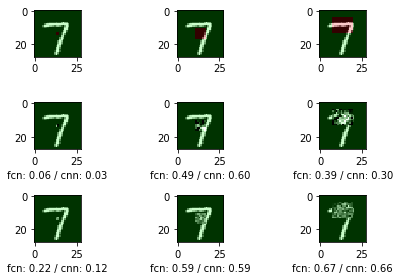

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


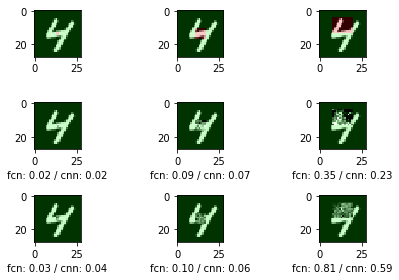

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


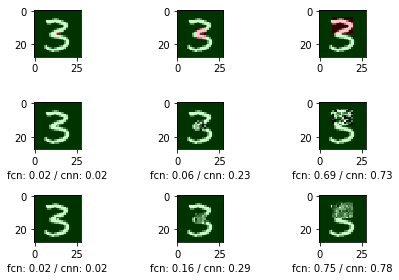

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


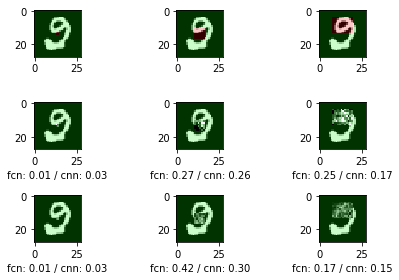

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


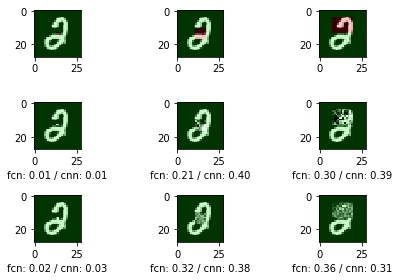

In [12]:
gauss_gen = GaussianGenerator(X_train)
stupid_gen = StupidGenerator(X_train)

def add_filter(image_, f):
    image = np.array(image_)
    #image = np.array(f)
    filtered_image = np.zeros([784, 3])
    filtered_image[:,0] = image*0.8
    filtered_image[:,1] = image*0.8
    filtered_image[:,2] = image*0.8
    filtered_image[:,0][f==0] += 0.2
    filtered_image[:,1][f!=0] += 0.2
    filtered_image =  np.reshape(filtered_image, [28, 28, 3])
    return filtered_image

def abs_loss(y, p, labels):
    return np.mean(np.absolute(y*labels - p*labels))

for image_id, (image_, label) in enumerate(zip(X_test, Y_test)):
    plt.clf()
    # show image with all filters + relevance
    for filter_id, f in enumerate([s_c, m_c, m_l]):
        filtered_image =  add_filter(image_, f)
        plt.subplot(3, 3, filter_id+1)
        plt.imshow(filtered_image)
        
        for g_id, generator in enumerate([gauss_gen, stupid_gen]):
            cnn_rel = cnn.generator_relevance(image_[None,...], f, generator, abs_loss, labels=label[None,...])
            fcn_rel = fcn.generator_relevance(image_[None,...], f, generator, abs_loss, labels=label[None,...])
            translated = add_filter(generator(image_[None,...], f), f*0+1)
            plt.subplot(3, 3, filter_id+4+3*g_id)
            plt.tight_layout()
            plt.imshow(translated)
            plt.xlabel("fcn: {:.2f} / cnn: {:.2f}".format(fcn_rel, cnn_rel))
         
    plt.show("{}.png".format(image_id))